In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [131]:
data = pd.read_csv('train.csv')
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

(array([14., 13.,  0.,  6., 10.,  4.,  0.,  3.,  4.,  4., 10.,  1.,  2.,
         5.,  3.,  4.,  0.,  8.,  8., 19., 16.,  2., 31., 31., 15., 29.,
         1., 29., 18., 35., 28.,  2., 33., 25., 28., 28.,  4., 36., 23.,
        22., 25.,  0., 20., 22., 29., 10.,  3., 16., 19., 16.,  9.,  2.,
        17.,  7., 10.,  3., 15.,  4., 10., 10.,  1.,  8., 12.,  7.,  6.,
         0.,  2.,  8.,  2.,  6.,  0.,  4.,  5.,  2.,  4.,  0.,  3.,  4.,
         2.,  2.,  0.,  4.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0478,
        

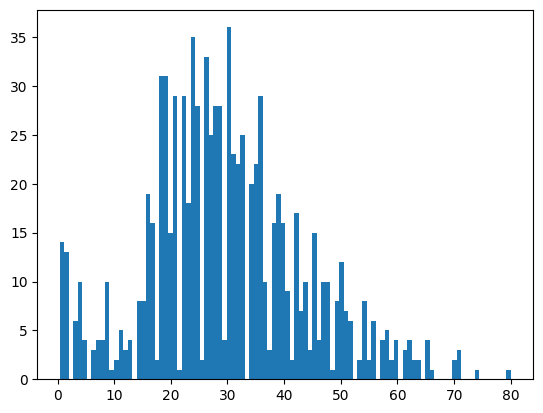

In [151]:
plt.hist(data.Age, 100)
# plt.show()

<Axes: xlabel='Age', ylabel='Density'>

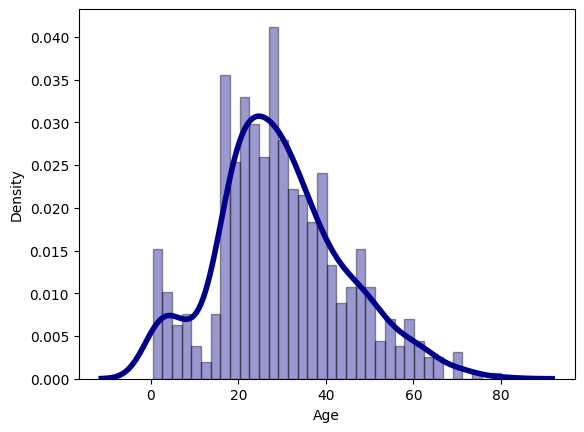

In [133]:

import seaborn as sns

sns.distplot(data.Age, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [134]:
missing_data = data.Age.isnull().sum()
print("Кількість пропущених значень:", missing_data)
print("Відсоток пропущених значень від загальної кількості:",missing_data/len(data.Age)*100)

Кількість пропущених значень: 177
Відсоток пропущених значень від загальної кількості: 19.865319865319865


In [135]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [136]:
data.groupby(data['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [137]:
data['Age_NaN'] = np.where(data['Age'].isnull(), 0,1)
data.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NaN
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0


In [138]:
data.groupby(['Age_NaN']) ['Survived'].value_counts(normalize=True)

Age_NaN  Survived
0        0           0.706215
         1           0.293785
1        0           0.593838
         1           0.406162
Name: Survived, dtype: float64

In [139]:
data.groupby(['Age_NaN','Pclass']) ['Survived'].value_counts(normalize=True)

Age_NaN  Pclass  Survived
0        1       0           0.533333
                 1           0.466667
         2       0           0.636364
                 1           0.363636
         3       0           0.750000
                 1           0.250000
1        1       1           0.655914
                 0           0.344086
         2       0           0.520231
                 1           0.479769
         3       0           0.760563
                 1           0.239437
Name: Survived, dtype: float64

In [140]:
pd.crosstab(data['Pclass'], data['Age_NaN'])

Age_NaN,0,1
Pclass,,
1,30,186
2,11,173
3,136,355


In [141]:
data.groupby(['Age_NaN','Sex']) ['Survived'].value_counts(normalize=True)

Age_NaN  Sex     Survived
0        female  1           0.679245
                 0           0.320755
         male    0           0.870968
                 1           0.129032
1        female  1           0.754789
                 0           0.245211
         male    0           0.794702
                 1           0.205298
Name: Survived, dtype: float64

In [142]:
pd.crosstab(data['Sex'], data['Age_NaN'])

Age_NaN,0,1
Sex,,
female,53,261
male,124,453


Так як серед пасажирів, у яких значення віку не було, були живі (близько 30%) і загиблі (близько 70%), і пасажири були з різних класів (з 3 класу було значно більше), і серед пасажирів були чоловіки та жінки (чоловіків було значно більше), то при опитуванні у тих, хто вижив, і при огляді тіл загиблих могли випадково пропустити вік пасажира.

Отже, робимо висновок, що вік випадково не занесли.

Вирішення: Пропущені значення заповнити середнім значенням.

In [143]:
data.Age_NaN = data.Age
data['Age_New'] = data.Age
data['Age_New'].fillna(data['Age_New'].mean(), inplace = True)
data.Age_New

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_New, Length: 891, dtype: float64

<Axes: xlabel='Age_New', ylabel='Density'>

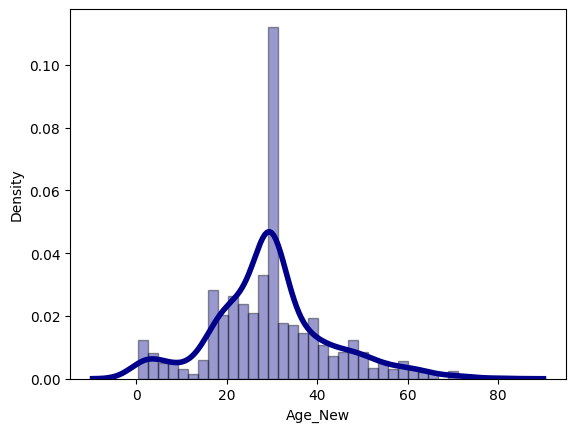

In [144]:

sns.distplot(data.Age_New, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [167]:
x = np.array([ 0.42  ,  1.2158,  2.0116,  2.8074,  3.6032,  4.399 ,  5.1948,
         5.9906,  6.7864,  7.5822,  8.378 ,  9.1738,  9.9696, 10.7654,
        11.5612, 12.357 , 13.1528, 13.9486, 14.7444, 15.5402, 16.336 ,
        17.1318, 17.9276, 18.7234, 19.5192, 20.315 , 21.1108, 21.9066,
        22.7024, 23.4982, 24.294 , 25.0898, 25.8856, 26.6814, 27.4772,
        28.273 , 29.0688, 29.8646, 30.6604, 31.4562, 32.252 , 33.0478,
        33.8436, 34.6394, 35.4352, 36.231 , 37.0268, 37.8226, 38.6184,
        39.4142, 40.21  , 41.0058, 41.8016, 42.5974, 43.3932, 44.189 ,
        44.9848, 45.7806, 46.5764, 47.3722, 48.168 , 48.9638, 49.7596,
        50.5554, 51.3512, 52.147 , 52.9428, 53.7386, 54.5344, 55.3302,
        56.126 , 56.9218, 57.7176, 58.5134, 59.3092, 60.105 , 60.9008,
        61.6966, 62.4924, 63.2882, 64.084 , 64.8798, 65.6756, 66.4714,
        67.2672, 68.063 , 68.8588, 69.6546, 70.4504, 71.2462, 72.042 ,
        72.8378, 73.6336, 74.4294, 75.2252, 76.021 , 76.8168, 77.6126,
        78.4084, 79.2042,     ])
y = np.array([14., 13.,  0.,  6., 10.,  4.,  0.,  3.,  4.,  4., 10.,  1.,  2.,
         5.,  3.,  4.,  0.,  8.,  8., 19., 16.,  2., 31., 31., 15., 29.,
         1., 29., 18., 35., 28.,  2., 33., 25., 28., 28.,  4., 36., 23.,
        22., 25.,  0., 20., 22., 29., 10.,  3., 16., 19., 16.,  9.,  2.,
        17.,  7., 10.,  3., 15.,  4., 10., 10.,  1.,  8., 12.,  7.,  6.,
         0.,  2.,  8.,  2.,  6.,  0.,  4.,  5.,  2.,  4.,  0.,  3.,  4.,
         2.,  2.,  0.,  4.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.])


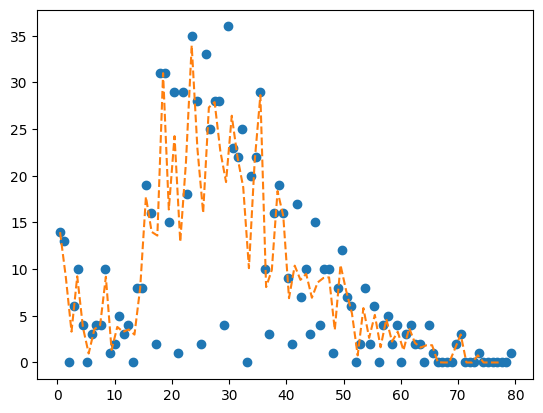

In [168]:
import matplotlib.pyplot as plt
from scipy import interpolate

f = interpolate.interp1d(x,y)
x1 = np.arange(0.45,78)
y1 = f(x1)
plt.plot(x,y, 'o', x1,y1, '--')
plt.show()

дуже виділяється середній вік пасажирів, у реальному житті такого бути не може, тому заповнимо недостаючі значення за допомогою інтерполяції

In [169]:
data["Age"] = pd.to_numeric(data["Age"], errors="coerce").interpolate()
data.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    22.5
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: xlabel='Age', ylabel='Density'>

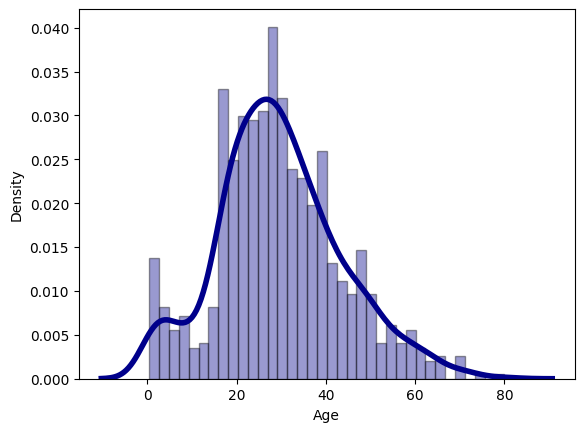

In [170]:
sns.distplot(data.Age, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [171]:
missing_data = data.Age.isnull().sum()
print("Кількість пропущених значень:", missing_data)
print("Відсоток пропущених значень від загальної кількості:",missing_data/len(data.Age)*100)

Кількість пропущених значень: 0
Відсоток пропущених значень від загальної кількості: 0.0


In [172]:
import scipy.stats as stats
stats.ttest_ind(a = data.Age, b = data.Age_New)

TtestResult(statistic=0.04225064048418453, pvalue=0.9663036319028193, df=1780.0)